In [211]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

In [212]:
df = pd.read_csv('./data/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [213]:
df.shape

(1460, 81)

In [214]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [215]:
df.drop(columns=['Id'],inplace=True)

Target Distribution-- y and log(y)

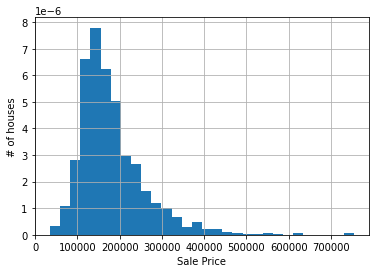

In [216]:
df['SalePrice'].hist(bins=30,density=True)
plt.ylabel('# of houses')
plt.xlabel('Sale Price')
plt.show()

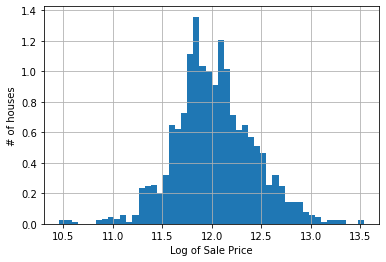

In [217]:
np.log(df['SalePrice']).hist(bins=50,density=True)
plt.ylabel('# of houses')
plt.xlabel('Log of Sale Price')
plt.show()

'''The log(sale price) distribution is Gaussian'''

In [218]:
#df.info()

In [219]:
# Cat variables have type object
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

print(len(cat_cols))
print(cat_cols)

43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [220]:
num_cols = [
    var for var in df.columns if var not in cat_cols and var != 'SalePrice'
]
len(num_cols)
print(num_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


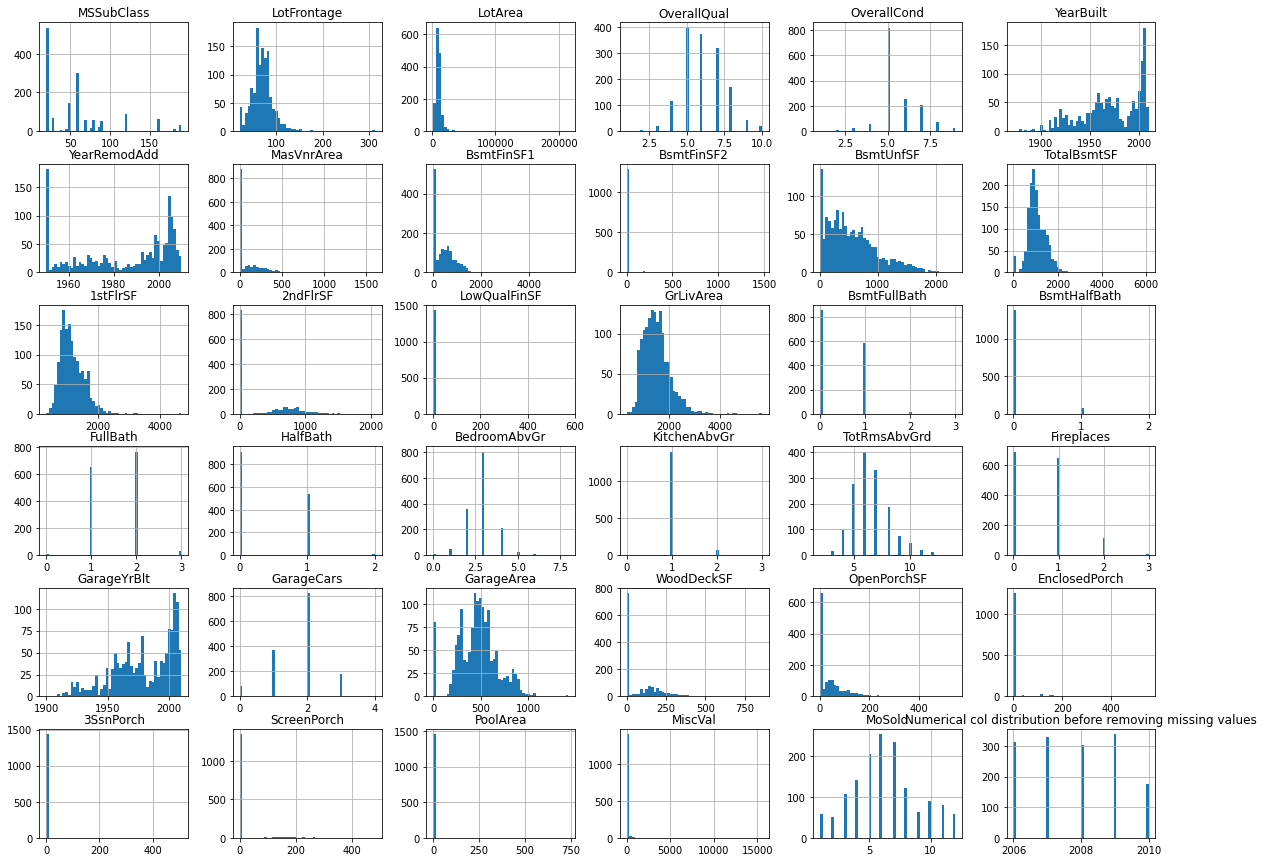

In [222]:
df_num = df[num_cols]
df_num.hist(bins=50, figsize=(20,15))
plt.title('Numerical col distribution before removing missing values')
plt.show()

### Handle Missing values

In [223]:
cols_w_na = [col for col in df.columns if df[col].isnull().sum() > 0 ]
# Percentage of missing values from greatest to least
df[cols_w_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

The 4 top variables have such a huge porportion of missing values that it is best to drop those columns:

In [224]:
cols_to_remove = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df.drop(columns=cols_to_remove,inplace=True)
num_cat_cols_removed = 0
for i in range(len(cols_to_remove)):
    if cols_to_remove[i] in cat_cols:
        cat_cols.remove(cols_to_remove[i])
        num_cat_cols_removed += 1
    if cols_to_remove[i] in num_cols:
        cat_cols.remove(cols_to_remove[i])
print(num_cat_cols_removed)

4


In [225]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [229]:
num_single_value_cols = 0
for col in df.columns:
    if df[col].nunique() == 0 or df[col].nunique() == 1:
        num_single_value_cols += 1
        df.drop(columns=[col], inplace=True)
print(num_single_value_cols)

0


In [231]:
cols_w_na = [col for col in df.columns if df[col].isnull().sum() > 0]

## Handle missing num values

In [232]:
for col in cols_w_na:
    if col in num_cols:
        print(col)
        print(df[col].mean())
        df[col] = df[col].fillna(df[col].mean(), inplace=True)

LotFrontage
70.04995836802665
MasVnrArea
103.68526170798899
GarageYrBlt
1978.5061638868744


array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>],
       [<AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomA

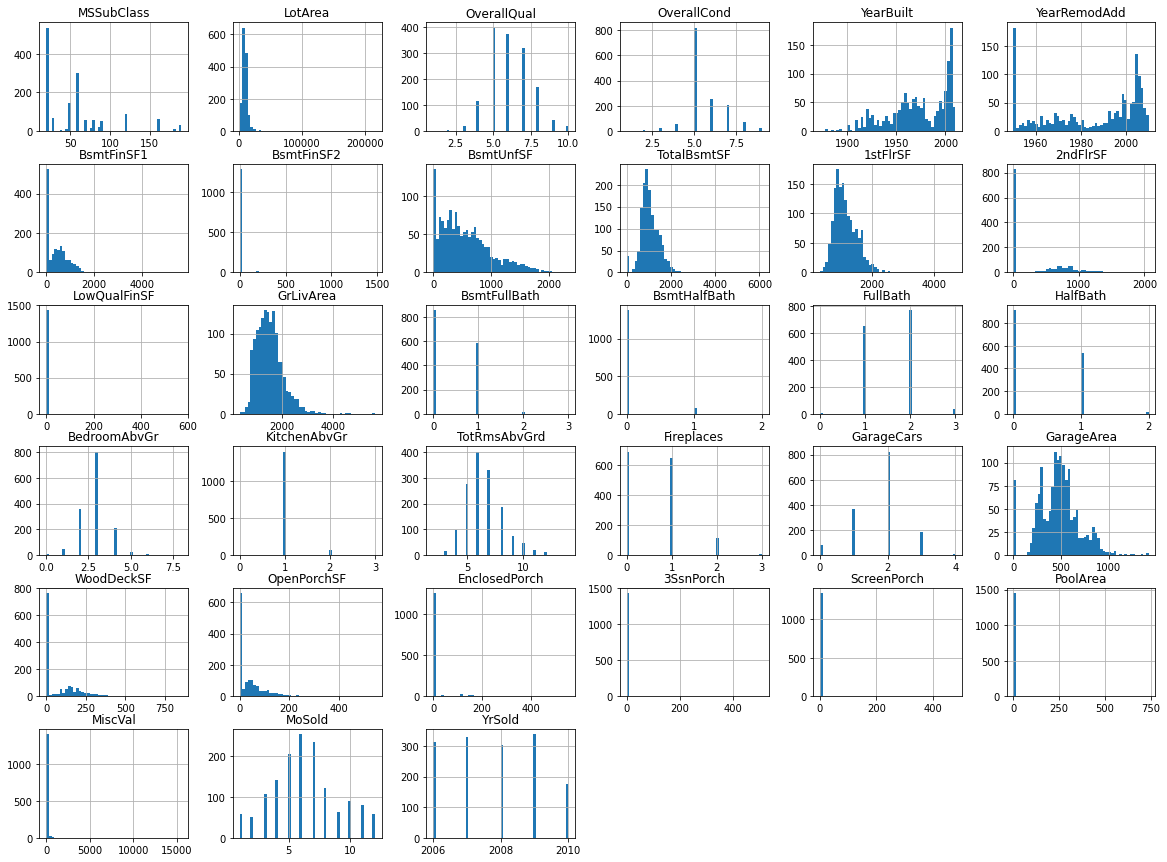

In [234]:
df_num = df[num_cols]
df_num.hist(bins=50, figsize=(20,15))

## Handle missing cat values

In [236]:
cat_cols_w_na = []
for col in cols_w_na:
    if col in cat_cols:
        cat_cols_w_na.append(col)

In [238]:
# TODO: show plots as a grid instead of one col (so it looks like the hist plots for the num_vars)
for col in cat_cols_w_na:
    df[col].hist(bins=30)
    plt.ylabel('# of houses')
    plt.xlabel(col)
    plt.show()

'''Tried here to do TODO above but not sucessful'''
# num_rows = int(math.sqrt(len(cat_cols_w_na)) + 1)
# num_cols = num_rows
# plt.figure()
# for i in range(len(cat_cols_w_na)):
#         plt.subplot(num_rows, num_cols,i + 1)
#         df[cat_cols_w_na[i]].hist()
#         plt.ylabel('# of houses')
#         plt.xlabel(cat_cols_w_na[i])
#         plt.show()
    

'Tried here to do TODO above but not sucessful'

In [239]:
mostfreq = df['MasVnrType'].value_counts().idxmax()
print(mostfreq)

None


We can impute missing cat values using the mode

In [240]:
for col in cat_cols_w_na:
    print(col)
    most_frequent = df[col].value_counts().idxmax()
    print(most_frequent)
    df[col] = df[col].fillna(most_frequent)


MasVnrType
None
BsmtQual
TA
BsmtCond
TA
BsmtExposure
No
BsmtFinType1
Unf
BsmtFinType2
Unf
Electrical
SBrkr
FireplaceQu
Gd
GarageType
Attchd
GarageFinish
Unf
GarageQual
TA
GarageCond
TA


In [241]:
'''Make sure missing values are no more'''
cols_w_na_check = [col for col in cat_cols_w_na if df[col].isna().any()]
cols_w_na_check

[]

## Convert cat -> num values

Kaggle website gives the folowing mappings, which we can use for ordinal mapping to encode cat cols w/ such categories
* Ex = Excellent
* Gd = Good
* TA = Average/Typical
* Fa = Fair
* Po = Poor

In [242]:
print(len(cat_cols))
print(cat_cols)

39
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [243]:

ord_cat_mapping = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

ord_cats = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for col in ord_cats:
    df[col] = df[col].map(ord_cat_mapping)

In [244]:
print('LotFrontage' in cat_cols)

False


In [245]:
cat_cols =  [col for col in cat_cols if col not in ord_cats]
print(len(cat_cols))



30


In [246]:
df[cat_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Unf,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Rec,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Rec,GasA,Y,FuseA,Typ,Attchd,Unf,Y,WD,Normal


In [247]:
one_hot_cats = []
te_features = []
uniq_vals = []
for col in cat_cols:
    n_uniq = df[col].nunique()
    uniq_vals.append(n_uniq)
    if n_uniq <= 5:
        one_hot_cats.append(col)
    else:
        te_features.append(col)
print('one-hot features: ' + str(one_hot_cats))
print('target features: ' + str(te_features))

one-hot features: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'MasVnrType', 'BsmtExposure', 'CentralAir', 'Electrical', 'GarageFinish', 'PavedDrive']
target features: ['Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']


In [266]:
print(len(one_hot_cats))
print(len(te_features))

14
16


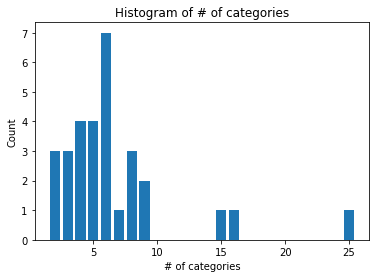

In [249]:
vals, counts = np.unique(uniq_vals, return_counts=True)

# create the histogram plot
plt.bar(vals, counts)

# add labels to the plot
plt.xlabel('# of categories')
plt.ylabel('Count')
plt.title('Histogram of # of categories')

# display the plot
plt.show()

In [250]:
X_train = df.drop(columns='SalePrice')
y_train = df['SalePrice']

In [251]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [252]:
one_hot_cats

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'MasVnrType',
 'BsmtExposure',
 'CentralAir',
 'Electrical',
 'GarageFinish',
 'PavedDrive']

In [253]:
oe = OneHotEncoder()
one_hot_data = oe.fit_transform(X_train[one_hot_cats])
one_hot_df = pd.DataFrame(one_hot_data.toarray(), columns=oe.get_feature_names_out(one_hot_cats))
X_train = pd.concat([X_train.drop(columns=one_hot_cats), one_hot_df], axis=1)

te = TargetEncoder()
X_train[te_features] = te.fit_transform(X_train[te_features], y_train)

In [254]:
te_features

['Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'Functional',
 'GarageType',
 'SaleType',
 'SaleCondition']

In [255]:
X_train

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60,None,8450,197965.734807,184495.492063,181169.405536,210051.764045,7,5,2003,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,20,None,9600,197643.209810,142561.517167,181169.405536,175985.477961,6,8,1976,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,60,None,11250,197965.734807,184495.492063,181169.405536,210051.764045,7,5,2001,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,70,None,9550,209344.287867,184495.492063,181169.405536,210051.764045,7,5,1915,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,60,None,14260,318453.591177,184495.492063,181169.405536,210051.764045,8,5,2000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,None,7917,192821.904993,184495.492063,181169.405536,210051.764045,6,5,1999,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1456,20,None,13175,189009.693995,184495.492063,181169.405536,175985.477961,6,6,1978,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1457,70,None,9042,209344.287867,184495.492063,181169.405536,210051.764045,7,9,1941,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1458,20,None,9717,145847.080044,184495.492063,181169.405536,175985.477961,5,6,1950,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [256]:
pd.set_option('display.max_columns', None)

In [257]:
corr_matrix = X_train.corr()
corr_matrix

,MSSubClass,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y
MSSubClass,1.000000,-0.139781,0.038072,0.013423,-0.033318,0.191470,0.032628,-0.059316,0.027850,0.040581,-0.136268,-0.025205,0.009180,0.002264,0.016178,-0.064686,0.066298,0.076820,-0.005152,0.110838,-0.069836,0.055559,-0.065649,-0.140759,-0.238518,-0.033208,-0.019458,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,-0.012383,0.040380,0.030254,-0.045569,-0.004771,-0.025307,-0.040110,-0.098672,0.024439,-0.025864,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.038260,-0.049610,-0.001762,0.171336,0.058288,-0.343353,0.277750,0.024969,-0.024969,-0.112626,-0.019392,-0.031221,0.122030,0.017973,-0.010676,-0.032201,0.010845,0.022844,-0.022844,-0.063811,-0.044437,0.015217,0.044130,0.067828,0.024344,-0.018716,-0.017184,-0.817461,0.444511,0.150441,0.415159,0.524847,-0.058382,0.053159,-0.026401,-0.019922,0.058105,0.016593,0.003846,-0.057068,0.101774,-0.101774,-0.056977,-0.006760,0.049830,-0.016653,0.046727,0.012199,-0.045044,0.030458,0.069317,-0.025338,-0.047611
LotArea,-0.139781,1.000000,0.127705,0.005612,0.043776,-0.009041,0.105806,-0.005636,0.014228,0.013788,0.096607,0.143650,-0.012195,-0.020783,0.055570,0.014732,-0.025334,0.079775,0.028160,0.005180,0.214103,-0.091918,0.111170,-0.002618,0.260833,-0.029791,0.003581,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.067864,0.190015,-0.028370,0.271364,-0.049090,0.119056,0.154871,0.180403,0.026851,0.016833,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.021915,0.029395,-0.008452,-0.083895,-0.033092,0.204065,-0.173709,0.197131,-0.197131,0.097235,0.225160,0.256526,-0.216111,0.028095,0.089605,0.359475,-0.256843,-0.010123,0.010123,0.042722,0.179440,-0.002167,-0.009511,-0.132773,-0.310711,0.092649,0.540380,0.163554,0.077767,-0.015346,-0.141863,-0.167717,0.115884,-0.016388,-0.030547,0.038328,-0.001411,0.278062,0.005495,-0.174000,-0.049755,0.049755,-0.033353,-0.028974,-0.016882,-0.004066,0.046321,0.102667,0.014502,-0.101163,-0.019325,0.012568,0.010431
Neighborhood,0.038072,0.127705,1.000000,0.201904,0.069854,0.321382,0.685262,-0.226517,0.642786,0.503096,0.132867,0.023675,0.407540,0.415253,0.657143,-0.072451,0.578787,0.662900,0.132123,0.454528,0.240330,0.091465,-0.062689,0.220035,0.448427,0.100969,0.415531,0.387237,0.201213,-0.073966,0.445193,0.137792,-0.059058,0.503304,0.238852,0.028686,-0.136584,0.579019,0.306577,0.134443,0.306984,-0.000037,0.392617,0.561223,0.522282,0.093033,0.097124,0.246084,0.208726,-0.179270,0.015710,-0.003300,-0.002797,-0.048646,0.051155,

In [258]:
'''TODO: Remove a col from col pairs which have correlation >= .8'''
threshold = 0.8
cols_to_remove = set()
removed_corrs = [] # don't make set() bc 2 pairs of cols may have exact same correlations
for feat1 in X_train.columns:
    for feat2 in X_train.columns:
        if feat2 <= feat1:
            continue
        corr = X_train[feat1].corr(X_train[feat2])
        if abs(corr) >= threshold:
            if not feat1 in cols_to_remove:
                cols_to_remove.add(feat1)
                print(feat1)
                removed_corrs.append(abs(corr))
                print(abs(corr))

Exterior1st
0.9481526839864024
1stFlrSF
0.8195299750050337
GrLivArea
0.8254893743088426
GarageArea
0.8824754142814625
SaleCondition
0.9546945238184041
MSZoning_RL
0.8085853546363102
Street_Grvl
0.9999999999999998
LotShape_IR1
0.9259589789196673
Utilities_AllPub
1.0
LandSlope_Gtl
0.9086074526366433
BldgType_1Fam
0.8174605009618731
MasVnrType_BrkFace
0.806336954093057
CentralAir_N
1.0
Electrical_FuseA
0.8572829837352666
PavedDrive_N
0.8564908886472556


In [259]:
print(cols_to_remove)
print(removed_corrs)

{'MSZoning_RL', 'Utilities_AllPub', 'MasVnrType_BrkFace', 'PavedDrive_N', 'Electrical_FuseA', 'GrLivArea', '1stFlrSF', 'Exterior1st', 'LotShape_IR1', 'LandSlope_Gtl', 'GarageArea', 'Street_Grvl', 'SaleCondition', 'BldgType_1Fam', 'CentralAir_N'}
[0.9481526839864024, 0.8195299750050337, 0.8254893743088426, 0.8824754142814625, 0.9546945238184041, 0.8085853546363102, 0.9999999999999998, 0.9259589789196673, 1.0, 0.9086074526366433, 0.8174605009618731, 0.806336954093057, 1.0, 0.8572829837352666, 0.8564908886472556]


In [260]:
print(len(cols_to_remove))

15


In [261]:
'''Drop the highly correlated columns'''
X_train.drop(columns=list(cols_to_remove), inplace=True)

## Visualize data after Preprocessing

In [262]:
'''We dont visualize the cols resulting from one_hot_encoding since those cols have each only one val'''
one_hot_trans_cols = oe.get_feature_names_out(one_hot_cats)

non_one_hot_cols = []
for col in X_train.columns:
    if col not in one_hot_trans_cols:
        non_one_hot_cols.append(col)

/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'Condition1'}>,
        <AxesSubplot:title={'center':'Condition2'}>,
        <AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'RoofStyle'}>,
        <AxesSubplot:title={'center':'RoofMatl'}>,
        <AxesSubplot:title={'center':'Exterior2nd'}>,
        <AxesSubplot:title={'center':'ExterQual'}>],
       [<AxesSubplot:title={'center':'ExterCond'}>,
        <AxesSubplot:title={'center':'Foundation'}>,
        <AxesSubplot:title={'center':'BsmtQual'}>,
        <AxesSubplot:title={'center':'BsmtCond'}>,
        <AxesSubplot:title={'center':'BsmtFinType1

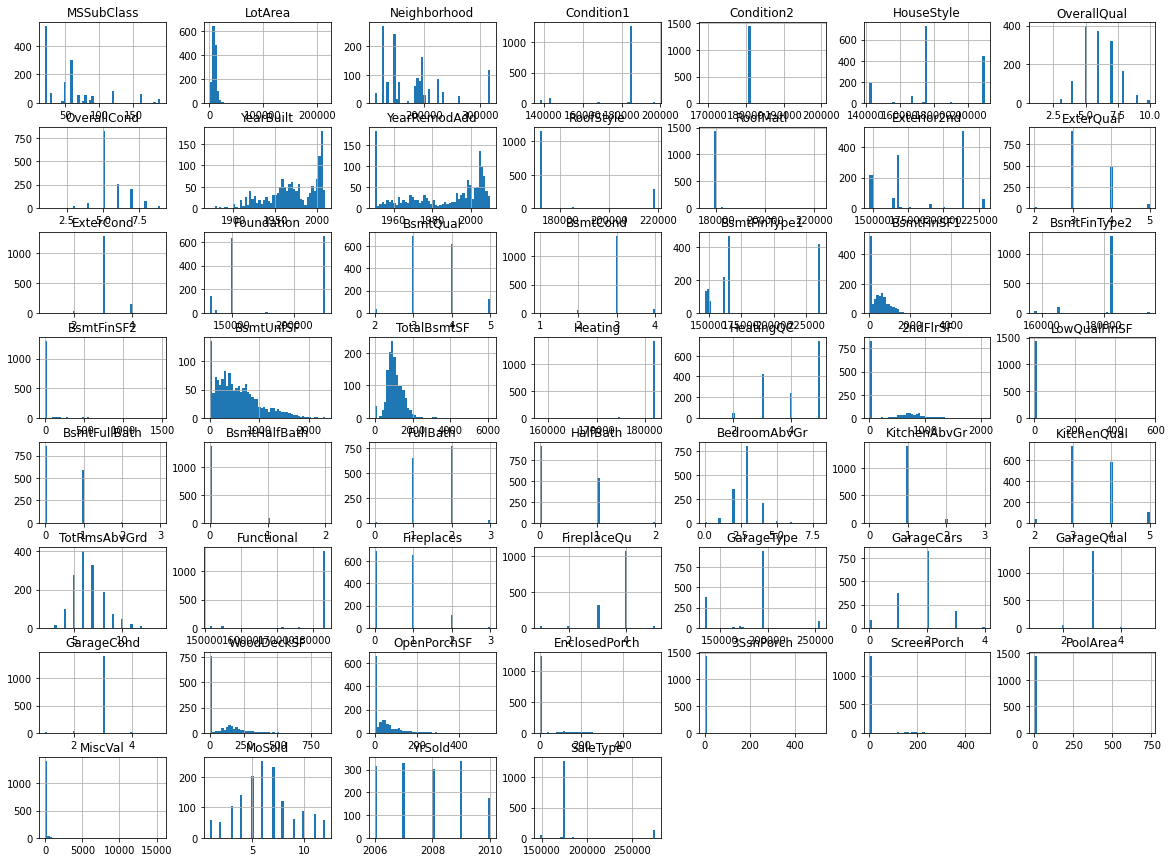

In [263]:
X_train[non_one_hot_cols].hist(bins=50, figsize=(20,15))

In [264]:
X_train = X_train.drop_duplicates()

## Export as preprocessed_train.csv

In [265]:
df.to_csv('preprocessed_train.csv')